In [16]:
## Installation
'''bash
pip install volatility-estimators''''''

or

```bash
git clone https://github.com/Eishita0506/volatility-estimators.git
cd volatility-estimators
pip install -e .'''

'bash\npip install volatility-estimators\n\nor\n\n```bash\ngit clone https://github.com/Eishita0506/volatility-estimators.git\ncd volatility-estimators\npip install -e .'

In [2]:
# Install and Import
!pip install yfinance pandas numpy matplotlib seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

print("📊 Volatility Estimators - Practical Example")

📊 Volatility Estimators - Practical Example


In [3]:
from volatility_estimators.core import VolatilityEstimators, DataSimulator, PerformanceMetrics

In [4]:
# Download SPY data for the last year
ticker = "SPY"
data = yf.download(ticker, period="1y", interval="1d")

print(f"Downloaded {len(data)} days of {ticker} data")
print(f"Columns: {list(data.columns)}")
print(f"Date range: {data.index[0]} to {data.index[-1]}")

[*********************100%***********************]  1 of 1 completed

Downloaded 251 days of SPY data
Columns: [('Close', 'SPY'), ('High', 'SPY'), ('Low', 'SPY'), ('Open', 'SPY'), ('Volume', 'SPY')]
Date range: 2024-10-23 00:00:00 to 2025-10-23 00:00:00


In [7]:
# Initialize and Calculate Volatilities
# Create estimator instance
estimator = VolatilityEstimators(window=30)

# Calculate all volatility estimates
print("Calculating volatility estimates...")

volatility_estimates = {
    "Close-to-Close": estimator.close_to_close(data['Close']),
    "Parkinson": estimator.parkinson(data['High'], data['Low']),
    "Garman-Klass": estimator.garman_klass(data['Open'], data['High'], data['Low'], data['Close']),
    "Rogers-Satchell": estimator.rogers_satchell(data['Open'], data['High'], data['Low'], data['Close']),
    "Yang-Zhang": estimator.yang_zhang(data['Open'], data['High'], data['Low'], data['Close'])
}

print("📈 VOLATILITY ESTIMATES FOR SPY:")
print("=" * 40)
for name, vol in volatility_estimates.items():
    # Extract scalar value if it's a Series
    if hasattr(vol, 'iloc'):
        vol_value = vol.iloc[0] if len(vol) > 0 else vol
    else:
        vol_value = vol
    print(f"{name:15}: {float(vol_value):.3f} ({float(vol_value)*100:.1f}%)")

Calculating volatility estimates...
📈 VOLATILITY ESTIMATES FOR SPY:
Close-to-Close : 0.116 (11.6%)
Parkinson      : 0.102 (10.2%)
Garman-Klass   : 0.098 (9.8%)
Rogers-Satchell: 0.095 (9.5%)
Yang-Zhang     : 0.114 (11.4%)


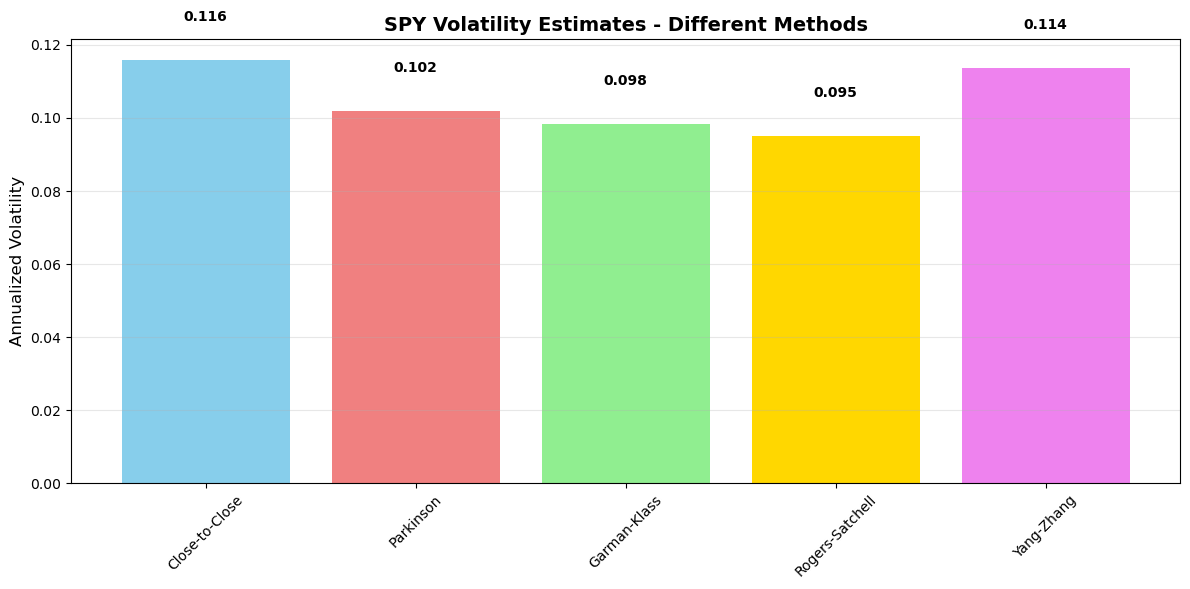

In [10]:
# Visualize Results
# Create comparison chart
plt.figure(figsize=(12, 6))

names = list(volatility_estimates.keys())
values = []

# Convert all values to scalars
for name in names:
    vol = volatility_estimates[name]
    # Ensure we have a scalar value
    if hasattr(vol, 'item'):  # numpy array
        values.append(float(vol.item()))
    elif hasattr(vol, 'iloc'):  # pandas Series
        values.append(float(vol.iloc[0]))
    else:
        values.append(float(vol))

bars = plt.bar(names, values, color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'violet'])
plt.title('SPY Volatility Estimates - Different Methods', fontsize=14, fontweight='bold')
plt.ylabel('Annualized Volatility', fontsize=12)
plt.xticks(rotation=45)

# Add value labels on bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


📊 VOLATILITY COMPARISON ACROSS ASSETS:
SPY   : 0.113 (11.3%)
AAPL  : 0.217 (21.7%)
GOOGL : 0.264 (26.4%)
TSLA  : 0.507 (50.7%)


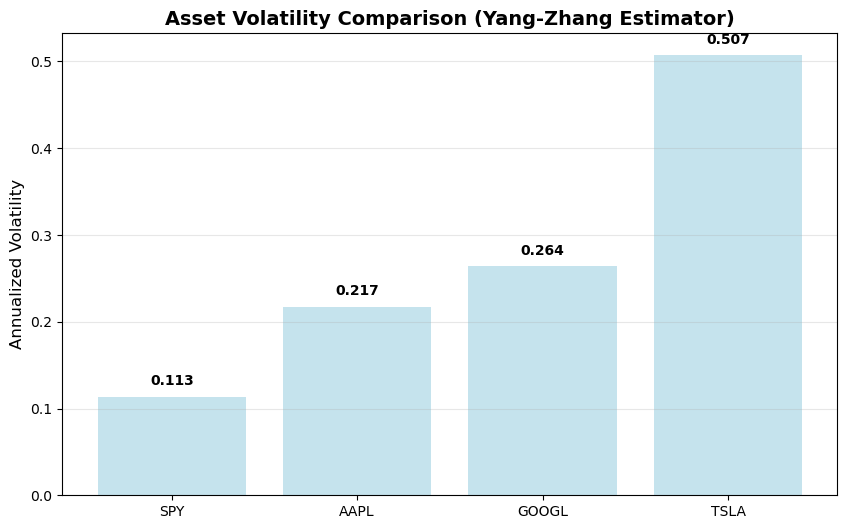

In [12]:
#  Multiple Assets Comparison
# Compare multiple assets
tickers = ['SPY', 'AAPL', 'GOOGL', 'TSLA']
assets_data = {}

print("Downloading data for multiple assets...")
for ticker in tickers:
    assets_data[ticker] = yf.download(ticker, period="6mo", progress=False)

# Calculate Yang-Zhang volatility for each asset (most robust method)
print("\n📊 VOLATILITY COMPARISON ACROSS ASSETS:")
print("=" * 50)

asset_volatilities = {}
for ticker, data in assets_data.items():
    if len(data) > 30:  # Ensure we have enough data
        try:
            vol = estimator.yang_zhang(data['Open'], data['High'], data['Low'], data['Close'])
            # Ensure vol is a scalar value
            if hasattr(vol, 'iloc'):
                vol = float(vol.iloc[0])
            elif hasattr(vol, 'item'):
                vol = float(vol.item())
            else:
                vol = float(vol)
                
            asset_volatilities[ticker] = vol
            print(f"{ticker:6}: {vol:.3f} ({vol*100:.1f}%)")
        except Exception as e:
            print(f"{ticker:6}: Error - {e}")

# Plot comparison
plt.figure(figsize=(10, 6))
ticker_names = list(asset_volatilities.keys())
vol_values = list(asset_volatilities.values())

bars = plt.bar(ticker_names, vol_values, color='lightblue', alpha=0.7)
plt.title('Asset Volatility Comparison (Yang-Zhang Estimator)', fontsize=14, fontweight='bold')
plt.ylabel('Annualized Volatility', fontsize=12)

# Add value labels
for bar, value in zip(bars, vol_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

plt.grid(True, alpha=0.3, axis='y')
plt.show()

In [13]:
# Simple Recommendation System
class SimpleRecommender:
    def recommend(self, data_available):
        if data_available == ['close']:
            return "Close-to-Close (only closing prices available)"
        elif data_available == ['high', 'low']:
            return "Parkinson (high/low data available)"
        elif data_available == ['open', 'high', 'low', 'close']:
            return "Yang-Zhang (full OHLC data - most robust)"
        else:
            return "Garman-Klass (basic OHLC data)"

# Example recommendations
recommender = SimpleRecommender()

print("🎯 ESTIMATOR RECOMMENDATIONS:")
print("=" * 40)
print(f"Only Close prices: {recommender.recommend(['close'])}")
print(f"High/Low prices: {recommender.recommend(['high', 'low'])}")
print(f"Full OHLC data: {recommender.recommend(['open', 'high', 'low', 'close'])}")

🎯 ESTIMATOR RECOMMENDATIONS:
Only Close prices: Close-to-Close (only closing prices available)
High/Low prices: Parkinson (high/low data available)
Full OHLC data: Yang-Zhang (full OHLC data - most robust)


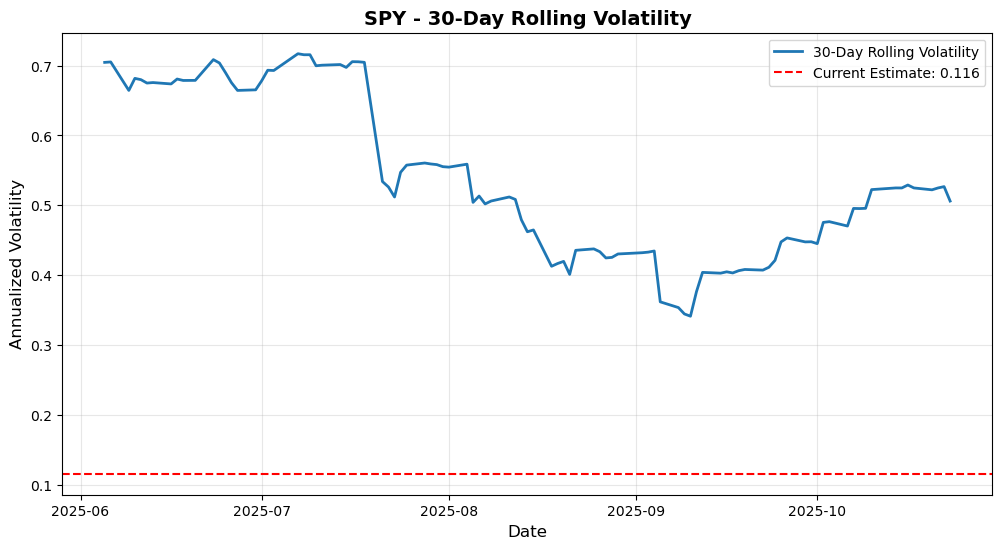

In [15]:
# Rolling Volatility Example (FIXED)
# Calculate rolling volatility using Close-to-Close method
returns = np.log(data['Close'] / data['Close'].shift(1))
rolling_vol = returns.rolling(window=30).std() * np.sqrt(252)

plt.figure(figsize=(12, 6))
plt.plot(rolling_vol.index, rolling_vol, linewidth=2, label='30-Day Rolling Volatility')

# Get the current volatility estimate as a scalar
current_vol = volatility_estimates['Close-to-Close']
if hasattr(current_vol, 'iloc'):
    current_vol = float(current_vol.iloc[0])
elif hasattr(current_vol, 'item'):
    current_vol = float(current_vol.item())
else:
    current_vol = float(current_vol)

plt.axhline(y=current_vol, color='red', linestyle='--', 
            label=f'Current Estimate: {current_vol:.3f}')

plt.title('SPY - 30-Day Rolling Volatility', fontsize=14, fontweight='bold')
plt.ylabel('Annualized Volatility', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()